# Scikit Learn & Kaggle
This week, we're going to learn about sci-kit learn.  For this lesson, I also want to introduce you to [Kaggle](https://www.kaggle.com/competitions) and its massive community of data scientists and learning materials.  Kaggle is a great place to get your feet wet with machine learning projects, and compare your approach to how others -- often hundreds of others -- have tackled the same problem.  

For this exercise, we're going to walk through a Kaggle competition that is perfect for learning about scikit learn: The [Titanic Challenge](https://www.kaggle.com/c/titanic). 

## Lesson Plan

1. The first step is to go to the site and learn a bit about the challenge: https://www.kaggle.com/c/titanic
2. Once you've got a sense of what we're trying to do (predict whether a person will survive), we'll walk through the basics of loading our packages and data.  
3. Then we'll spend a fair amount of time just looking at the data and gettting it into good shape for sklearn. 
4. Then we'll actually use sklearn and learn the basics.  You'll see pretty quickly why people use scikit learn -- it lets you try out many combinations of paremeters in many types of models with a simple set of commands. 
5. Then, we'll connect all our steps togehter into what sklearn calls a "pipeline". This will add a layer of complexity to our work, but will allow us to use something called "grid search" to train our model across the entire grid of possilbe features combintions and features weights for any classifier. 
5. Finally, once we have our pipeline up and running, we can submit it to Kaggle & officially join the data science community there. Don't worry, there is pretty much zero chance that we will win the competition.  But we will win a place in the heart of data science! 

# Import Packages and Load Data

In [1]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import preprocessing 

import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from statsmodels.discrete.discrete_model import Logit

import matplotlib.pyplot as plt
% matplotlib  inline
import seaborn as sns; sns.set(color_codes=True)


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## A True Test
Before we import out data, one important note: our test data set has no values for "Survived".  Yup, that rights.  And that's how it should be. We're going to build a model using our training data, then use that model to generate data for our test data.  This is a great real-world check.  We don't get to peak at the test data; we have to try to guess it from what know of the training data.  Bye bye traditional stats; hello machine learning & data science!  


In [2]:
df_train = pd.read_csv('train.csv', header = 0, index_col = 'PassengerId')
df_test = pd.read_csv('test.csv', header = 0, index_col = 'PassengerId')

# I'm going to combine the two data sets for the purpose of data cleaning and feature generation.  
# But I'm going to keep track of them by labelling them "train" and "test" in the multi-index key. 
# That way I can select them later by using 'df.loc['train]' and df.loc['test'].  
# Multi-indexing is one of the ost powerful featurs of Pandas, and this is a perfect use for it. 

df = pd.concat([df_train, df_test], keys=["train", "test"])
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

## 01 - grok the multi-index
Now let's take a quick look at the data. just type "df" and see if you can see how the data is now organized. 

In [3]:
df

Age        Cabin Embarked      Fare  \
      PassengerId                                         
train 1            22.0          NaN        S    7.2500   
      2            38.0          C85        C   71.2833   
      3            26.0          NaN        S    7.9250   
      4            35.0         C123        S   53.1000   
      5            35.0          NaN        S    8.0500   
      6             NaN          NaN        Q    8.4583   
      7            54.0          E46        S   51.8625   
      8             2.0          NaN        S   21.0750   
      9            27.0          NaN        S   11.1333   
      10           14.0          NaN        C   30.0708   
      11            4.0           G6        S   16.7000   
      12           58.0         C103        S   26.5500   
      13           20.0          NaN        S    8.0500   
      14           39.0          NaN        S   31.2750   
      15           14.0          NaN        S    7.8542   
      16           55.0          NaN        S   16.0000   
      17            2.0          NaN        Q   29.1250   
      18            NaN          NaN        S   13.0000   
      19           31.0          NaN        S   18.0000   
      20            NaN          NaN        C    7.2250   
      21           35.0          NaN        S   26.0000   
      22           34.0          D56        S   13.0000   
      23           15.0          NaN        Q    8.0292   
      24           28.0           A6        S   35.5000   
      25            8.0          NaN        S   21.0750   
      26           38.0          NaN        S   31.3875   
      27            NaN          NaN        C    7.2250   
      28           19.0  C23 C25 C27        S  263.0000   
      29            NaN          NaN        Q    7.8792   
      30            NaN          NaN        S    7.8958   
...                 ...          ...      ...       ...   
test  1280         21.0          NaN        Q    7.7500   
      1281          6.0          NaN        S   21.0750   
      1282         23.0          B24        S   93.5000   
      1283         51.0          D28        S   39.4000   
      1284         13.0          NaN        S   20.2500   
      1285         47.0          NaN        S   10.5000   
      1286         29.0          NaN        S   22.0250   
      1287         18.0          C31        S   60.0000   
      1288         24.0          NaN        Q    7.2500   
      1289         48.0          B41        C   79.2000   
      1290         22.0          NaN        S    7.7750   
      1291         31.0          NaN        Q    7.7333   
      1292         30.0           C7        S  164.8667   
      1293         38.0          NaN        S   21.0000   
      1294         22.0          NaN        C   59.4000   
      1295         17.0          NaN        S   47.1000   
      1296         43.0          D40        C   27.7208   
      1297         20.0          D38        C   13.8625   
      1298         23.0          NaN        S   10.5000   
      1299         50.0          C80        C  211.5000   
      1300          NaN          NaN        Q    7.7208   
      1301          3.0          NaN        S   13.7750   
      1302          NaN          NaN        Q    7.7500   
      1303         37.0          C78        Q   90.0000   
      1304         28.0          NaN        S    7.7750   
      1305          NaN          NaN        S    8.0500   
      1306         39.0         C105        C  108.9000   
      1307         38.5          NaN        S    7.2500   
      1308          NaN          NaN        S    8.0500   
      1309          NaN          NaN        C   22.3583   

                                                                Name  Parch  \
      PassengerId                                                             
train 1                                      Braund, Mr. Owen Harris      0   
      2            Cumings, Mrs. John Bradley (Florence Briggs Th

# Feature Generation

OK, some of these fields look a little opaque.  What does SibSp mean?  To help with that, here's a data dictionary: 

```
Data Dictionary
Survived: Survival	0 = No, 1 = Yes
Pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
Sex: Sex	
Age: Age in years
SibSp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

```

In [4]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


## Cleaning up the data

First, notice that Age and Fare are missing some values.  Let's fill those in.  There are much fancier ways to do this, but I'll just put in the median.  

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

And what about Name, Sex, Ticket, Cabin, and Embarked?  Those are text fields.  As such, they can't be managed numerically.  Which means we have to transform them into numbers if we want to use them. Let's see if we can clean these up a bit. 

- "Name", for example is just text.  We might try to transform that using some fancy algorithms, but let's leave that alone for now.  
- "Sex" is a text field, too.  Let's turn that from a string into a one or a zero. 
- "Embarked" is also a text field, that should be turned into a set of dummy variables. 
- "Pclass" is a number, but it really should be a categorical variable fore each class. 

Let's do each right now. 

## 01 - pd.dummies

Using pandas excellent 'get_dummies' method, we can transform each of these variables (Sex, Embarked, and Pclass) into dummy binary variables. The command is really simple. 

```pd.get_dummies(train, columns = ['Pclass'])```

look up the documentation for that command, then see if you can return a dataframe that turns those three variables into dummies, while leaving the others intact. 

Easy, right? Let's do that for "Pclass", "Sex", and "Embarked" 

In [6]:
df = pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked'], drop_first=True).copy()
df.columns

Index(['Age', 'Cabin', 'Fare', 'Name', 'Parch', 'SibSp', 'Survived', 'Ticket',
       'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [7]:
df

Age        Cabin      Fare  \
      PassengerId                                
train 1            22.0          NaN    7.2500   
      2            38.0          C85   71.2833   
      3            26.0          NaN    7.9250   
      4            35.0         C123   53.1000   
      5            35.0          NaN    8.0500   
      6            28.0          NaN    8.4583   
      7            54.0          E46   51.8625   
      8             2.0          NaN   21.0750   
      9            27.0          NaN   11.1333   
      10           14.0          NaN   30.0708   
      11            4.0           G6   16.7000   
      12           58.0         C103   26.5500   
      13           20.0          NaN    8.0500   
      14           39.0          NaN   31.2750   
      15           14.0          NaN    7.8542   
      16           55.0          NaN   16.0000   
      17            2.0          NaN   29.1250   
      18           28.0          NaN   13.0000   
      19           31.0          NaN   18.0000   
      20           28.0          NaN    7.2250   
      21           35.0          NaN   26.0000   
      22           34.0          D56   13.0000   
      23           15.0          NaN    8.0292   
      24           28.0           A6   35.5000   
      25            8.0          NaN   21.0750   
      26           38.0          NaN   31.3875   
      27           28.0          NaN    7.2250   
      28           19.0  C23 C25 C27  263.0000   
      29           28.0          NaN    7.8792   
      30           28.0          NaN    7.8958   
...                 ...          ...       ...   
test  1280         21.0          NaN    7.7500   
      1281          6.0          NaN   21.0750   
      1282         23.0          B24   93.5000   
      1283         51.0          D28   39.4000   
      1284         13.0          NaN   20.2500   
      1285         47.0          NaN   10.5000   
      1286         29.0          NaN   22.0250   
      1287         18.0          C31   60.0000   
      1288         24.0          NaN    7.2500   
      1289         48.0          B41   79.2000   
      1290         22.0          NaN    7.7750   
      1291         31.0          NaN    7.7333   
      1292         30.0           C7  164.8667   
      1293         38.0          NaN   21.0000   
      1294         22.0          NaN   59.4000   
      1295         17.0          NaN   47.1000   
      1296         43.0          D40   27.7208   
      1297         20.0          D38   13.8625   
      1298         23.0          NaN   10.5000   
      1299         50.0          C80  211.5000   
      1300         28.0          NaN    7.7208   
      1301          3.0          NaN   13.7750   
      1302         28.0          NaN    7.7500   
      1303         37.0          C78   90.0000   
      1304         28.0          NaN    7.7750   
      1305         28.0          NaN    8.0500   
      1306         39.0         C105  108.9000   
      1307         38.5          NaN    7.2500   
      1308         28.0          NaN    8.0500   
      1309         28.0          NaN   22.3583   

                                                                Name  Parch  \
      PassengerId                                                             
train 1                                      Braund, Mr. Owen Harris      0   
      2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0   
      3                                       Heikkinen, Miss. Laina      0   
      4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0   
      5                                     Allen, Mr. William Henry      0   
      6                                             Moran, Mr. James      0   
      7                                      McCarthy, Mr. Timothy J      0   
      8                               Palsson, Master. Gosta Leonard      1   
      9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2   


Notice that I added 'drop_first=True' as a parameter to the get_dummies command.  Why do you think I do that? 

### A note on feature generation

The difference between a good model and a great model often depends on feature generation. Even when we just have a few variables like this, we can often generate hundreds of features from them by looking at various combinations.  For example, if we were really careful, we could probably figure out which passangers belong to which family and create a family ID.  Maybe members of smaller families do better than larger families, all other things being equal. Maybe single folks are more likely to survive because they are not held back by trying to save other family members.  Maybe members of families are more likely to survive because they are more motivated and can work together.  

We're not going to spend time adding all these features, but if this were something like detecting malignant tumors or scheduling police -- or perhaps even more importantly, finding rats! -- we'd be generating as many features as we could plausibly come up with.  As you'll see in a bit, having too many features is not as serious a problem for sklearn as it is for traditional frequentist linear models like traditional regression. 

All that is to say that feature generation is very important.  Try your hand at generating some features below. Start with an easy one: family size. Or try more if you like! 

In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [9]:
df['young'] = df.Age < 30
df['young_money'] = (df.young == 0) & (df.Pclass_2==0) & (df.Pclass_2==0)
df['old_money'] = (df.young == 1) & (df.Pclass_2==0) & (df.Pclass_2==0)

In [10]:
df['single'] = (df['SibSp'] == 0) & (df['Parch'] ==0)

In [11]:
df = pd.get_dummies(data=df, columns=['young_money','old_money','single'], drop_first=True).copy()

## 02 - Descriptive Statistics

Now use ```train.describe()``` to examine your data again. 

In [12]:
df.loc['train'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass_2,891.0,0.206510,0.405028,0.00,0.0000,0.0000,0.0,1.0000
Pclass_3,891.0,0.551066,0.497665,0.00,0.0000,1.0000,1.0,1.0000
Sex_male,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Embarked_Q,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
Embarked_S,891.0,0.722783,0.447876,0.00,0.0000,1.0000,1.0,1.0000


And now use the ```.corr()``` method to get basic correlations with Survived. 

In [13]:
df.corr()['Survived'].sort_values()

Sex_male           -0.543351
Pclass_3           -0.322308
single_True        -0.203367
Embarked_S         -0.155660
old_money_True     -0.098534
Age                -0.064910
SibSp              -0.035322
young              -0.035046
Embarked_Q          0.003650
FamilySize          0.016639
young_money_True    0.025635
Parch               0.081629
Pclass_2            0.093349
Fare                0.257307
Survived            1.000000
Name: Survived, dtype: float64

In [14]:
df.loc['train'].describe()

,Age,Fare,Parch,SibSp,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilySize,young_money_True,old_money_True,single_True
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.381594,0.523008,0.383838,0.206510,0.551066,0.647587,0.086420,0.722783,1.904602,0.274972,0.518519,0.602694
std,13.019697,49.693429,0.806057,1.102743,0.486592,0.405028,0.497665,0.477990,0.281141,0.447876,1.613459,0.446751,0.499938,0.489615
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,35.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000


Right away, we can see a few things.  The people who were more likely to die were men, 3rd class passenger, and passengers who boarded at Southampton.  Conversely, women, first class passengers, and passengers who boarded at Cherbourgh were more likely to survive.  Also, we an see that fare price is positively correlated with survival.  

If we were in the old world, just using statsmodels, we'd make a formula, maybe like this: 

```Survived ~ Sex_female * Parch + Pclass_1 + Fare + Embarked_C + SibSp```

And then we'd feed that model into a logistic regression. Then we'd develop our various intuitions by playing around with the model on our training set, adding, subtracting, and interacting variables in the linear equation. Then we'd make some informed hypotheses about the relationships in the data and test them on a validation data set. And finally, when had our sense that we really knew what was going on, we test our best models on the test set. 

But we're entering the world of data science and machine learning. We're going to become more and more rigorous about automating all of that, and far more agnostic about our feaures and models.  We'll work hard to develop good features for our model, but once we do that, we want to try to take the human out of the loop of manipulating and comparing models.  We'll turn running through all those features and models over to sklearn, and just give it a way to evaluate and compare them. 

# sklearn

The first thing we need to do is turn our training data into two matrices of equal length, one called "X" with our features, and the other called "Y" with our dependent variable (oddly, in the ML world, the y variable is often called your "labels"). 

## preparing our data

First, we'll make a data set without columns we're not using at the moment. (Please remember that you probably *can* and *should* use them when doing thorough feature generation.we're just not doing now for the sake of simplicity.)



In [15]:
df.columns

Index(['Age', 'Cabin', 'Fare', 'Name', 'Parch', 'SibSp', 'Survived', 'Ticket',
       'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'young', 'young_money_True', 'old_money_True',
       'single_True'],
      dtype='object')

In [16]:
df_tv = df.drop(['Cabin', 'Name', 'Ticket'], axis=1).copy().dropna()
tv = df_tv.loc['train']
X = tv.drop('Survived',  axis=1).as_matrix()
y = tv['Survived'].as_matrix()

sklearn doesn't read pandas dataframes -- instead it takes numpy matrices.  Let's compare what they look like: 

In [17]:
X

array([[22.0, 7.25, 0, ..., 0, 1, 0],
       [38.0, 71.2833, 0, ..., 1, 0, 0],
       [26.0, 7.925, 0, ..., 0, 1, 1],
       ..., 
       [28.0, 23.45, 2, ..., 0, 1, 0],
       [26.0, 30.0, 0, ..., 0, 1, 1],
       [32.0, 7.75, 0, ..., 1, 0, 1]], dtype=object)

In [18]:
y

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

Wow! Just lists of numbers in brackets.  Yup.  No labels.  That's why we wait until the very end to switch over to numpy matrices.  Pandas is way, way friendlier. 

## Create a validation set. 

This may be a bit confusing, but validation is really just another word for a pre-test test. And since sklearn really only has labels for train and test, that's what we'll use here. Just think of it as our validation set. 

To split our data, I'm going to use the sklearn method designed for this and helpfully named 'train_test_split'. I'm going to split these 50-50, though as data sets get larger, the splits can be more like 80-20 or 90-10. 

In [19]:
X_train, X_validate, y_train, y_validate = sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=42)

Now I have four matrices, X and y for training, and X and y for validating. 

## Feature Selection

My next goal is to figure out which features to use.  If we look at our feature set now, we can see we have 9 features. 

In [20]:
X_train.shape

(445, 14)

That's not a lot; what if we had 1,000?  or 100,000?   To address this, we'd use the SelectKBest command, which allows us to select the number of features we want. By default, "best" uses anova classification fit statistics, though it can be changed if we want; but that's not import right now -- it's a good default. 

Let's try select 5 features. 

In [21]:
X_new = sklearn.feature_selection.SelectKBest(k=5).fit_transform(X_train, y_train)
X_new.shape

(445, 5)

We'll automate more of this later, but holy-moly that was fast.  And easy.  Now I can have whatever number of features make sense for my particular use case.  Yay! 

## Training, predicting and evaluating. 

Now we can train our model on the test data.  We can use just about any classifier we want -- logistic regression, random forest, you name it. Let's start with what is one of the most common classifiers in machine learning: familiar old logistic regression. 

In [22]:
clf = sklearn.linear_model.LogisticRegression()  # describe our model
train_fit = clf.fit(X_train, y_train)            # train our model
y_prediction = train_fit.predict(X_validate)         # use our model to predict y varialbe for out validation data
y_prediction   # take a look at our validation predictions. 

array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0

# The ROC -- evaluating our model

Now we can evaluate how we did. The most common statistic for evaluating classifcation is the ROC, or the "Receiver Operator Curve".  It tells us how often we get false positives relative to true postivies. 


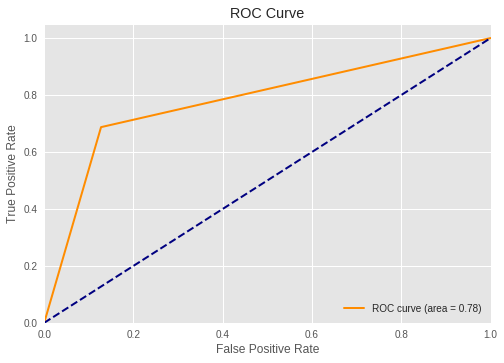

In [23]:
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

fpr, tpr, _ = roc_curve(y_validate, y_prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
df_test = df.loc['test'].drop(['Cabin', 'Name', 'Ticket'], axis=1)
X_test = df_test.drop('Survived',  axis=1).as_matrix()
y_test = train_fit.predict(X_test)         # use our model to predict y varialbe for out validation data

Now we just save it to upload to Kaggle.  Kaggle expects integers and a header row, so we'll give them that. 

In [25]:
df.loc['test','Survived'] = y_test
df.loc['test','Survived'].astype(int).to_csv('results.csv', header=True)

# That's it! 

We'll stop there for now.  

Go and upload your results to Kaggle. Then see if you can improve your score!  
